c:\Users\natra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression with degree 2 Performance:
R² Score: 0.993
RMSE: 0.439
MAE: 0.330
Future weather predictions saved to 'future_weather_predictions_2024.csv'


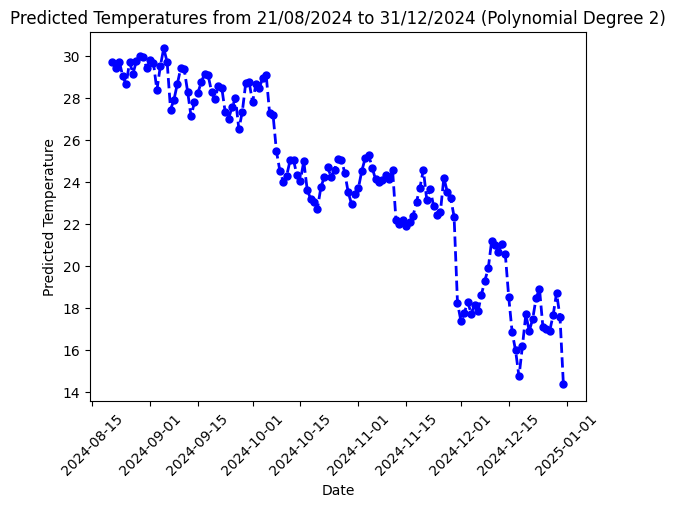

Model Coefficients for Polynomial Degree 2:
[ 0.          0.40229937  0.56707388  0.00778902 -0.01677099  0.00941641]
Model Intercept: 0.5501324323582324


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '../../../dataset/data.csv'  # Adjust the path to your dataset
data = pd.read_csv(file_path)

# Prepare the data for Polynomial Regression
data['ds'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y')

# Add 'day_of_year' to capture the seasonality
data['day_of_year'] = data['ds'].dt.dayofyear

# Features (tempmax and tempmin) and target (temp)
X = data[['tempmax', 'tempmin']]  # Features
y = data['temp']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Apply Polynomial Features with a fixed degree (e.g., degree = 2)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Initialize and train the Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 3: Predict on the test set and evaluate performance
y_pred = model.predict(X_test_poly)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)

print(f"Polynomial Regression with degree {degree} Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Step 4: Generate future dates from 21/08/2024 to 31/12/2024
future_dates = pd.date_range(start='2024-08-21', end='2024-12-31', freq='D')

# Calculate the average tempmax and tempmin for each day of the year (historical data)
daily_avg = data.groupby(data['day_of_year'])[['tempmax', 'tempmin']].mean().reset_index()

# Extract the day of year for future dates
future_day_of_year = future_dates.day_of_year

# Assign tempmax and tempmin based on historical averages for that day of the year
future_features = pd.DataFrame({
    'tempmax': [daily_avg.loc[daily_avg['day_of_year'] == day, 'tempmax'].values[0] for day in future_day_of_year],
    'tempmin': [daily_avg.loc[daily_avg['day_of_year'] == day, 'tempmin'].values[0] for day in future_day_of_year]
})

# Apply Polynomial Transformation to the future features
future_features_poly = poly.transform(future_features)

# Step 5: Predict the future temperatures using the trained Polynomial Regression model
future_predictions = model.predict(future_features_poly)

# Step 6: Create a DataFrame to store the future dates and predicted temperatures
future_results_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Temperature': future_predictions
})

# Step 7: Save the predictions to a CSV file
future_results_df.to_csv('future_weather_predictions_2024.csv', index=False)
print("Future weather predictions saved to 'future_weather_predictions_2024.csv'")

# Plot the future predicted temperatures
plt.plot(future_dates, future_predictions, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel('Date')
plt.ylabel('Predicted Temperature')
plt.title(f'Predicted Temperatures from 21/08/2024 to 31/12/2024 (Polynomial Degree {degree})')
plt.xticks(rotation=45)
plt.show()

# Display the coefficients of the model
print(f"Model Coefficients for Polynomial Degree {degree}:")
print(model.coef_)
print("Model Intercept:", model.intercept_)
